# 5.2

In [1]:
from sympy import *
from spb import plot
init_printing()

In [2]:
k1, k2, kc, kb2, l1, l2, lg, it = symbols('k_1 k_2 k_c k_{b2} l_1 l_2 l_g I_t', real=True, positive=True)
m2, mr, g, u, w, t, phiu = symbols('m_2 m_r g u omega t phi_u', real=True, positive=True)
xi, ks, F0s, hp, cs = symbols('xi k_s F_{0s} h_p c_s', real=True, positive=True)
z_1, z_2, omega, t = symbols("z_1, z_2 omega t")

M = Matrix([[l2**(-2)*it, 0], [0, m2]])
K = Matrix([[k2 + (-g*lg*mr + k1*l1**2 + kc)/l2**2, -k2], [-k2, 2*F0s*(cs+1)/hp + k2 + 2*ks*(I*xi+1) + kb2]])
F = Matrix([l2**-1*u*omega**2*(sin(phiu)-I*cos(phiu)), 0])

In [3]:
z_1, z_2, omega, t = symbols("z_1, z_2 omega t")
k_1, k_2, k_3, k_4 = symbols("k_1, k_2 k_3 k_4")
m_1, m_2 = symbols("m_1, m_2")
f_1, f_2 = symbols("f_1, f_2")

k_1, k_2, k_3, k_4 = K[0], K[1], K[2], K[3]
m_1, m_2 = M[0], M[1]
f_1, f_2 = F[0], F[1]

z = Matrix([z_1, z_2])*exp(I*omega*t)
k = K -omega**2 * M
f = Matrix([f_1, f_2])

mydict = {g:9.81,
        kc:0.7,
        u:14.8*10**(-6),
          phiu:7,
          mr:0.616,
          m2:1.410,
          it:31.2*10**(-3),
          lg:0.188,
          l1:0.118,
          l2:0.263,
          kb2:0.72*10**(3),
          k1:1.66*10**3,
          k2:1.61*10**3,
          hp:12*10**(-3), 
          cs:0.24}

v30 = {ks:0.83*1000, xi:33/100, F0s:5.2}
v50 = {ks:0.995*1000, xi:21/100, F0s:8}
v70 = {ks:1.37*1000, xi:10.5/100, F0s:9.65}

sol = k.gauss_jordan_solve(f)[0]
x = sol.subs(mydict)
x30 = x.subs(v30)
x50 = x.subs(v50)
x70 = x.subs(v70)

zt30 = x30
zt50 = x50 # z tilde
zt70 = x70

Ap301, Ap302 = abs(zt30)
Ap501, Ap502 = abs(zt50)
Ap701, Ap702 = abs(zt70)

In [4]:
def antires(z_tilde):
    løs_lejehus = (solve(Eq(z_tilde[0],0)))
    return ("Antiresonans opstår i akslen ved omega = ", abs(løs_lejehus[0]),"og",abs(løs_lejehus[1]))

display(antires(zt30),
        antires(zt50),
        antires(zt70))

('Antiresonans opstår i akslen ved omega = ', 0, 'og', 60.1075033028079)

('Antiresonans opstår i akslen ved omega = ', 0, 'og', 65.1671817689231)

('Antiresonans opstår i akslen ved omega = ', 0, 'og', 70.8118538968741)

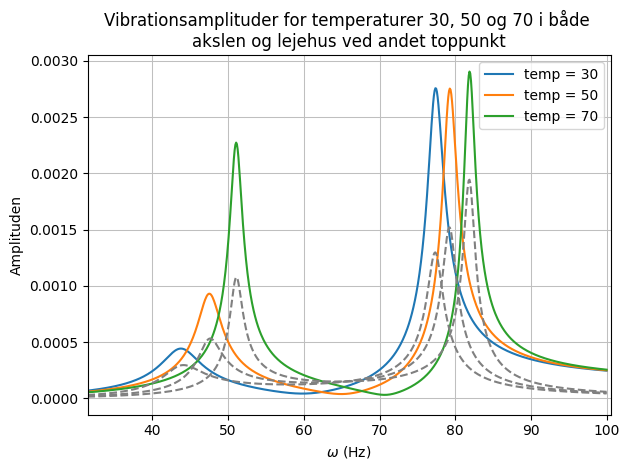

In [11]:
p1 = plot(Ap301, Ap501, Ap701, (omega, 0, 100), xlim=(10*pi, 32*pi), label=["temp = 30","temp = 50","temp = 70"], show=False);
p2 = plot(Ap302, Ap502, Ap702, (omega, 0, 100), xlim=(10*pi, 32*pi), label=["", "", ""], rendering_kw=dict(color="gray", linestyle="--"), show=False);
p_samlet = (p1 + p2)

p_samlet.title = "Vibrationsamplituder for temperaturer 30, 50 og 70 i både \nakslen og lejehus ved andet toppunkt"
p_samlet.ylabel = "Amplituden"
p_samlet.xlabel = "$\omega$ (Hz)"
p_samlet.show()

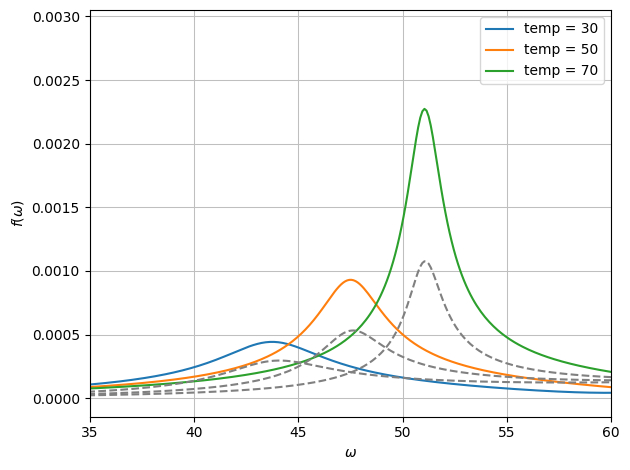

In [14]:
p1.xlim = (35, 60)
p_samlet2 = (p1 + p2)
p_samlet2.show()

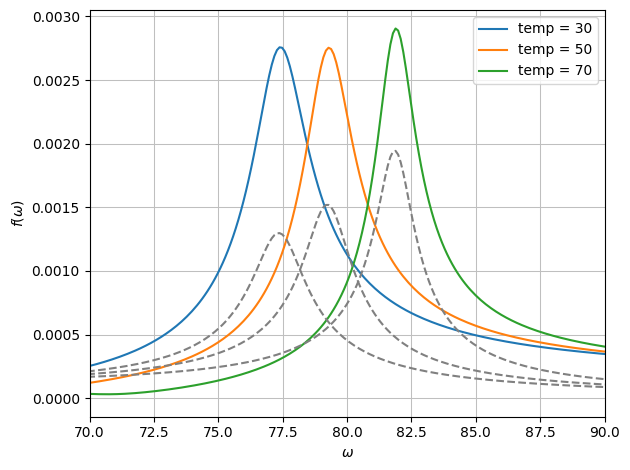

In [15]:
p1.xlim = (70, 90)
p_samlet2 = (p1 + p2)
p_samlet2.show()